# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# set columns show max 25
pd.set_option('display.max_columns', 25)

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('preprocessed/df.csv')
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,4,2,3,2,0,22,3,1,0,2,2,89,0,0,0,4,2,1
1,59,0,4,3,5534,1,3,1,3,0,21,4,0,3,2,2,21,0,0,0,2,1,1
2,24,0,10,2,8159,3,3,1,0,0,11,2,1,3,2,2,74,0,0,0,1,1,1
3,36,0,7,0,3989,3,3,4,1,0,27,1,2,2,2,1,50,1,0,0,3,2,1
4,56,1,41,0,4821,2,4,3,0,1,71,1,0,0,3,2,68,0,0,0,2,2,1


# Train Test Split

In [6]:
# train test split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(59546, 22)
(14887, 22)
(59546,)
(14887,)


In [7]:
# Scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

**Logistik Regression**

Classification Report: 
               precision    recall  f1-score   support

           0     0.7124    0.7165    0.7144      7051
           1     0.7436    0.7397    0.7416      7836

    accuracy                         0.7287     14887
   macro avg     0.7280    0.7281    0.7280     14887
weighted avg     0.7288    0.7287    0.7287     14887



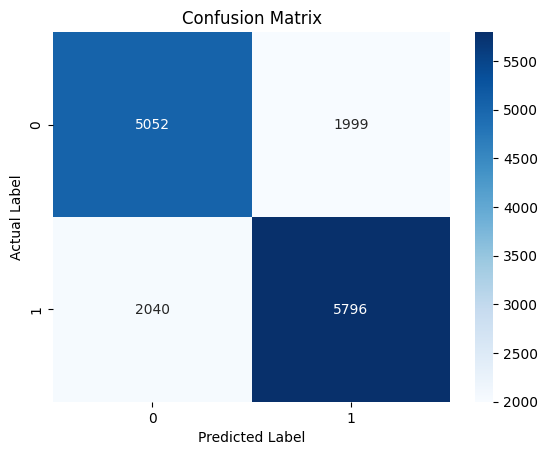

In [8]:
# Logistrik Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_y_pred = logreg.predict(X_test)

print('Classification Report: \n', classification_report(y_test, lg_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, lg_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**KNN**

              precision    recall  f1-score   support

           0     0.6792    0.6789    0.6791      7051
           1     0.7112    0.7115    0.7113      7836

    accuracy                         0.6960     14887
   macro avg     0.6952    0.6952    0.6952     14887
weighted avg     0.6960    0.6960    0.6960     14887



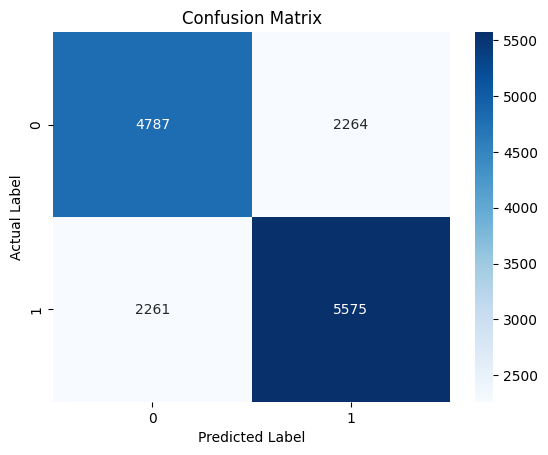

In [9]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, knn_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**Random Forest**

              precision    recall  f1-score   support

           0     0.7303    0.7441    0.7371      7051
           1     0.7658    0.7527    0.7592      7836

    accuracy                         0.7486     14887
   macro avg     0.7480    0.7484    0.7482     14887
weighted avg     0.7490    0.7486    0.7487     14887



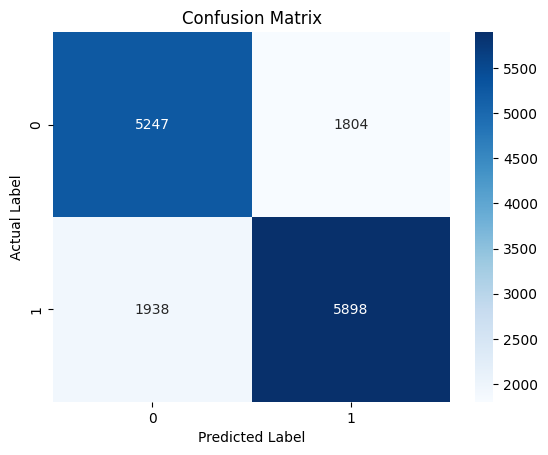

In [10]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, rf_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0     0.6425    0.6500    0.6462      7051
           1     0.6817    0.6746    0.6781      7836

    accuracy                         0.6629     14887
   macro avg     0.6621    0.6623    0.6622     14887
weighted avg     0.6631    0.6629    0.6630     14887



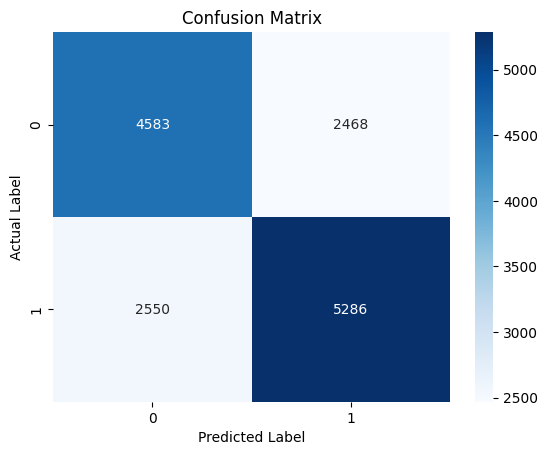

In [11]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, dt_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**SVC**

              precision    recall  f1-score   support

           0     0.7337    0.7392    0.7364      7051
           1     0.7637    0.7586    0.7611      7836

    accuracy                         0.7494     14887
   macro avg     0.7487    0.7489    0.7488     14887
weighted avg     0.7495    0.7494    0.7494     14887



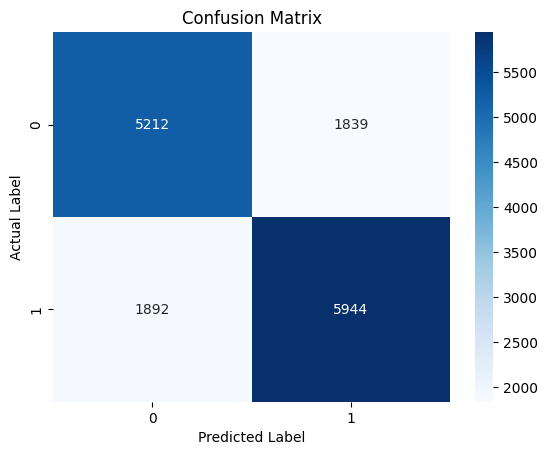

In [12]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, svc_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**Naive Bayes**

              precision    recall  f1-score   support

           0     0.6886    0.7590    0.7221      7051
           1     0.7612    0.6912    0.7245      7836

    accuracy                         0.7233     14887
   macro avg     0.7249    0.7251    0.7233     14887
weighted avg     0.7268    0.7233    0.7234     14887



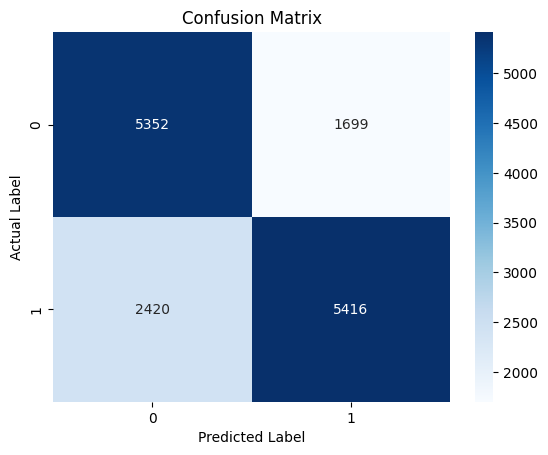

In [13]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, nb_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, nb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**XGboost**

              precision    recall  f1-score   support

           0     0.7309    0.7436    0.7372      7051
           1     0.7656    0.7537    0.7596      7836

    accuracy                         0.7489     14887
   macro avg     0.7483    0.7486    0.7484     14887
weighted avg     0.7492    0.7489    0.7490     14887



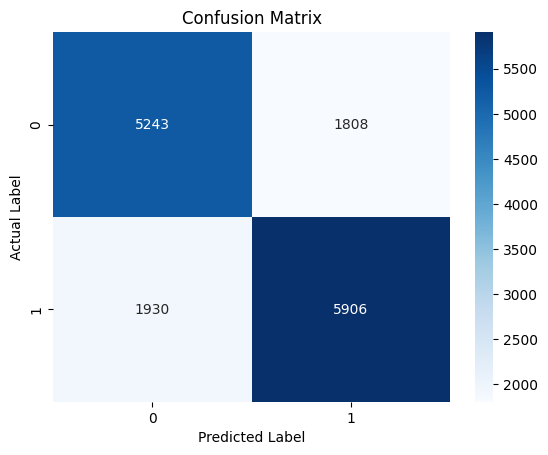

In [14]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, xgb_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**AdaBoost**

              precision    recall  f1-score   support

           0     0.7466    0.7477    0.7472      7051
           1     0.7727    0.7717    0.7722      7836

    accuracy                         0.7603     14887
   macro avg     0.7597    0.7597    0.7597     14887
weighted avg     0.7603    0.7603    0.7603     14887



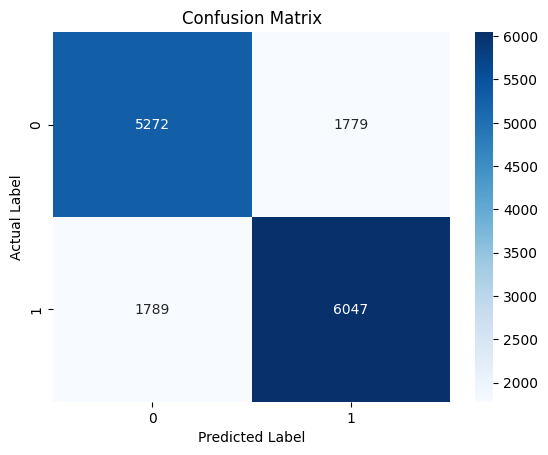

In [15]:
# ADaBoost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_y_pred = ada.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, ada_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, ada_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi

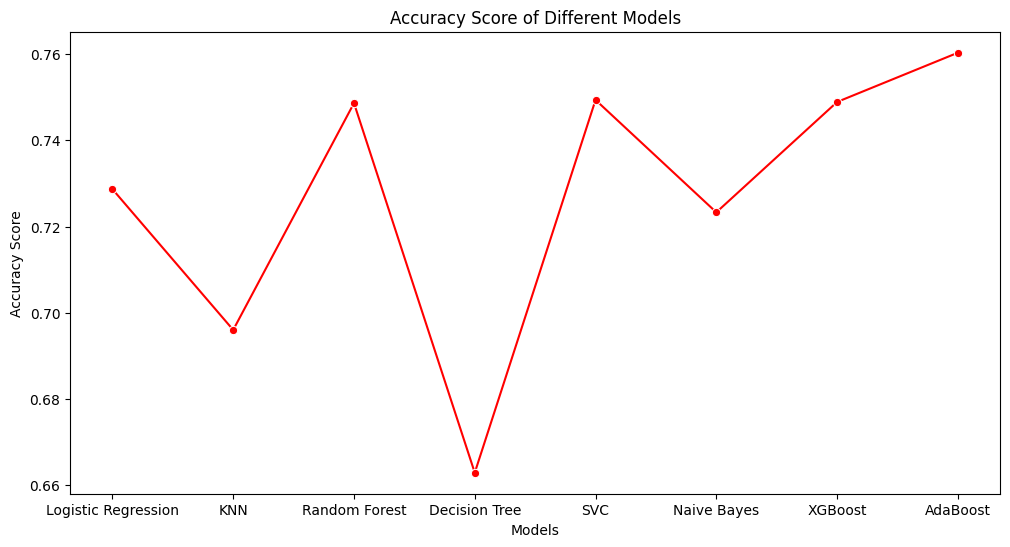

In [16]:
# Plotting the acuracy scores of all the models
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
accuracy = [accuracy_score(y_test, lg_y_pred), accuracy_score(y_test, knn_y_pred), accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, svc_y_pred), accuracy_score(y_test, nb_y_pred), accuracy_score(y_test, xgb_y_pred), accuracy_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=accuracy, marker='o', color='red')
plt.title('Accuracy Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

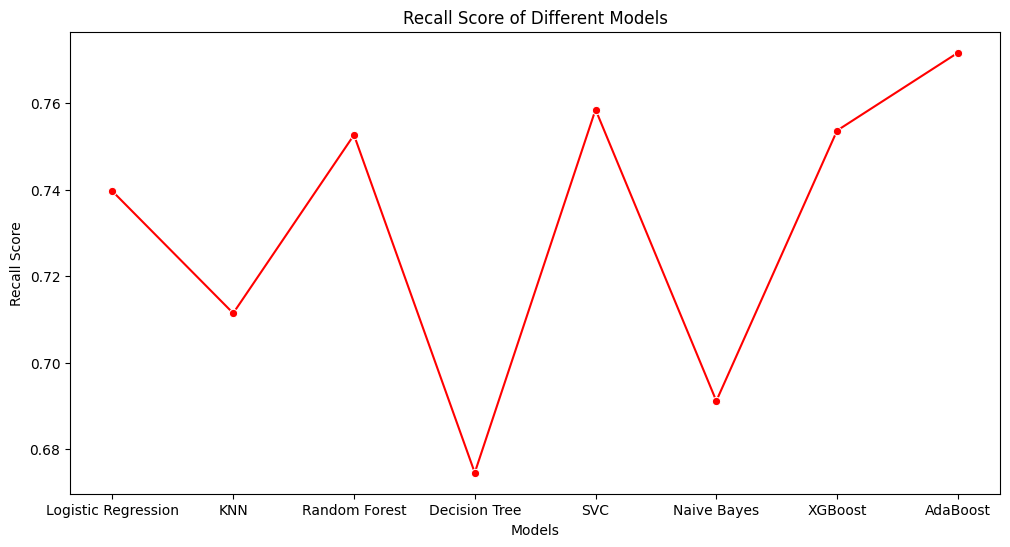

In [17]:
# Plotting the recall scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [recall_score(y_test, lg_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, rf_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, svc_y_pred), recall_score(y_test, nb_y_pred), recall_score(y_test, xgb_y_pred), recall_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('Recall Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

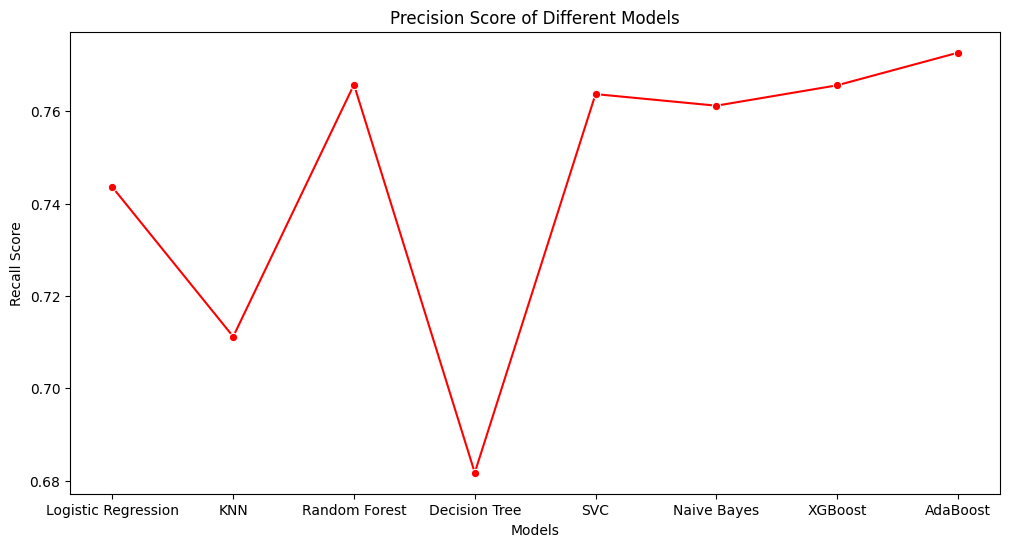

In [18]:
# Plotting the precision scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [precision_score(y_test, lg_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, rf_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, svc_y_pred), precision_score(y_test, nb_y_pred), precision_score(y_test, xgb_y_pred), precision_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('Precision Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

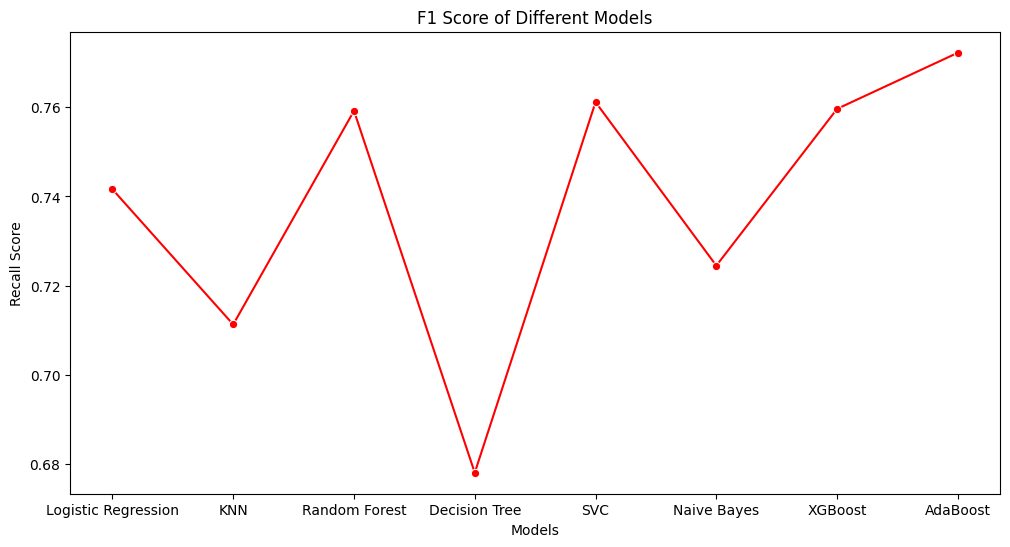

In [19]:
# Plotting the f1 scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [f1_score(y_test, lg_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, rf_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, svc_y_pred), f1_score(y_test, nb_y_pred), f1_score(y_test, xgb_y_pred), f1_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('F1 Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

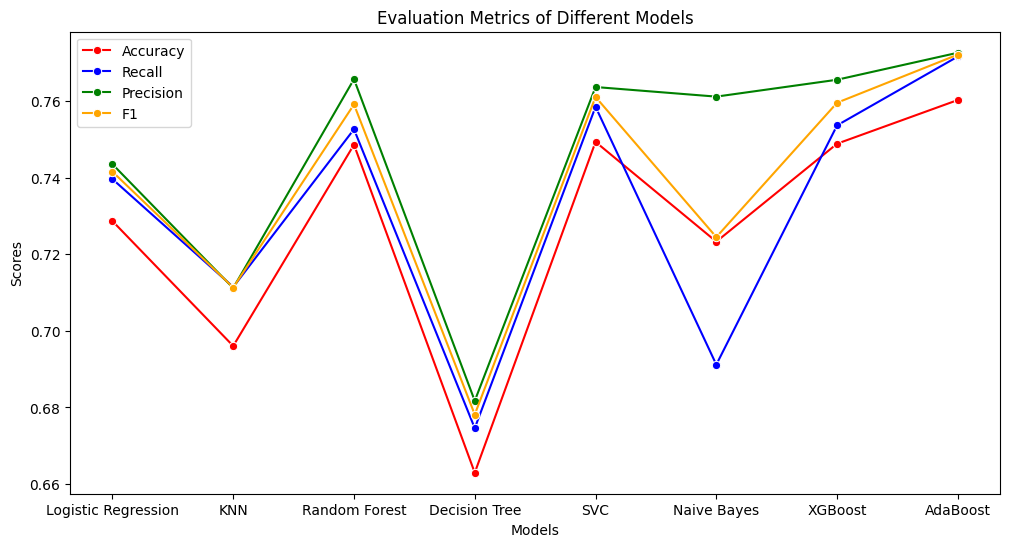

In [20]:
# plot all model all evaluation on one plot
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
accuracy = [accuracy_score(y_test, lg_y_pred), accuracy_score(y_test, knn_y_pred), accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, svc_y_pred), accuracy_score(y_test, nb_y_pred), accuracy_score(y_test, xgb_y_pred), accuracy_score(y_test, ada_y_pred)]
recall = [recall_score(y_test, lg_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, rf_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, svc_y_pred), recall_score(y_test, nb_y_pred), recall_score(y_test, xgb_y_pred), recall_score(y_test, ada_y_pred)]
precision = [precision_score(y_test, lg_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, rf_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, svc_y_pred), precision_score(y_test, nb_y_pred), precision_score(y_test, xgb_y_pred), precision_score(y_test, ada_y_pred)]
f1 = [f1_score(y_test, lg_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, rf_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, svc_y_pred), f1_score(y_test, nb_y_pred), f1_score(y_test, xgb_y_pred), f1_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=accuracy, marker='o', color='red', label='Accuracy')
sns.lineplot(x=models, y=recall, marker='o', color='blue', label='Recall')
sns.lineplot(x=models, y=precision, marker='o', color='green', label='Precision')
sns.lineplot(x=models, y=f1, marker='o', color='orange', label='F1')
plt.title('Evaluation Metrics of Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.show()

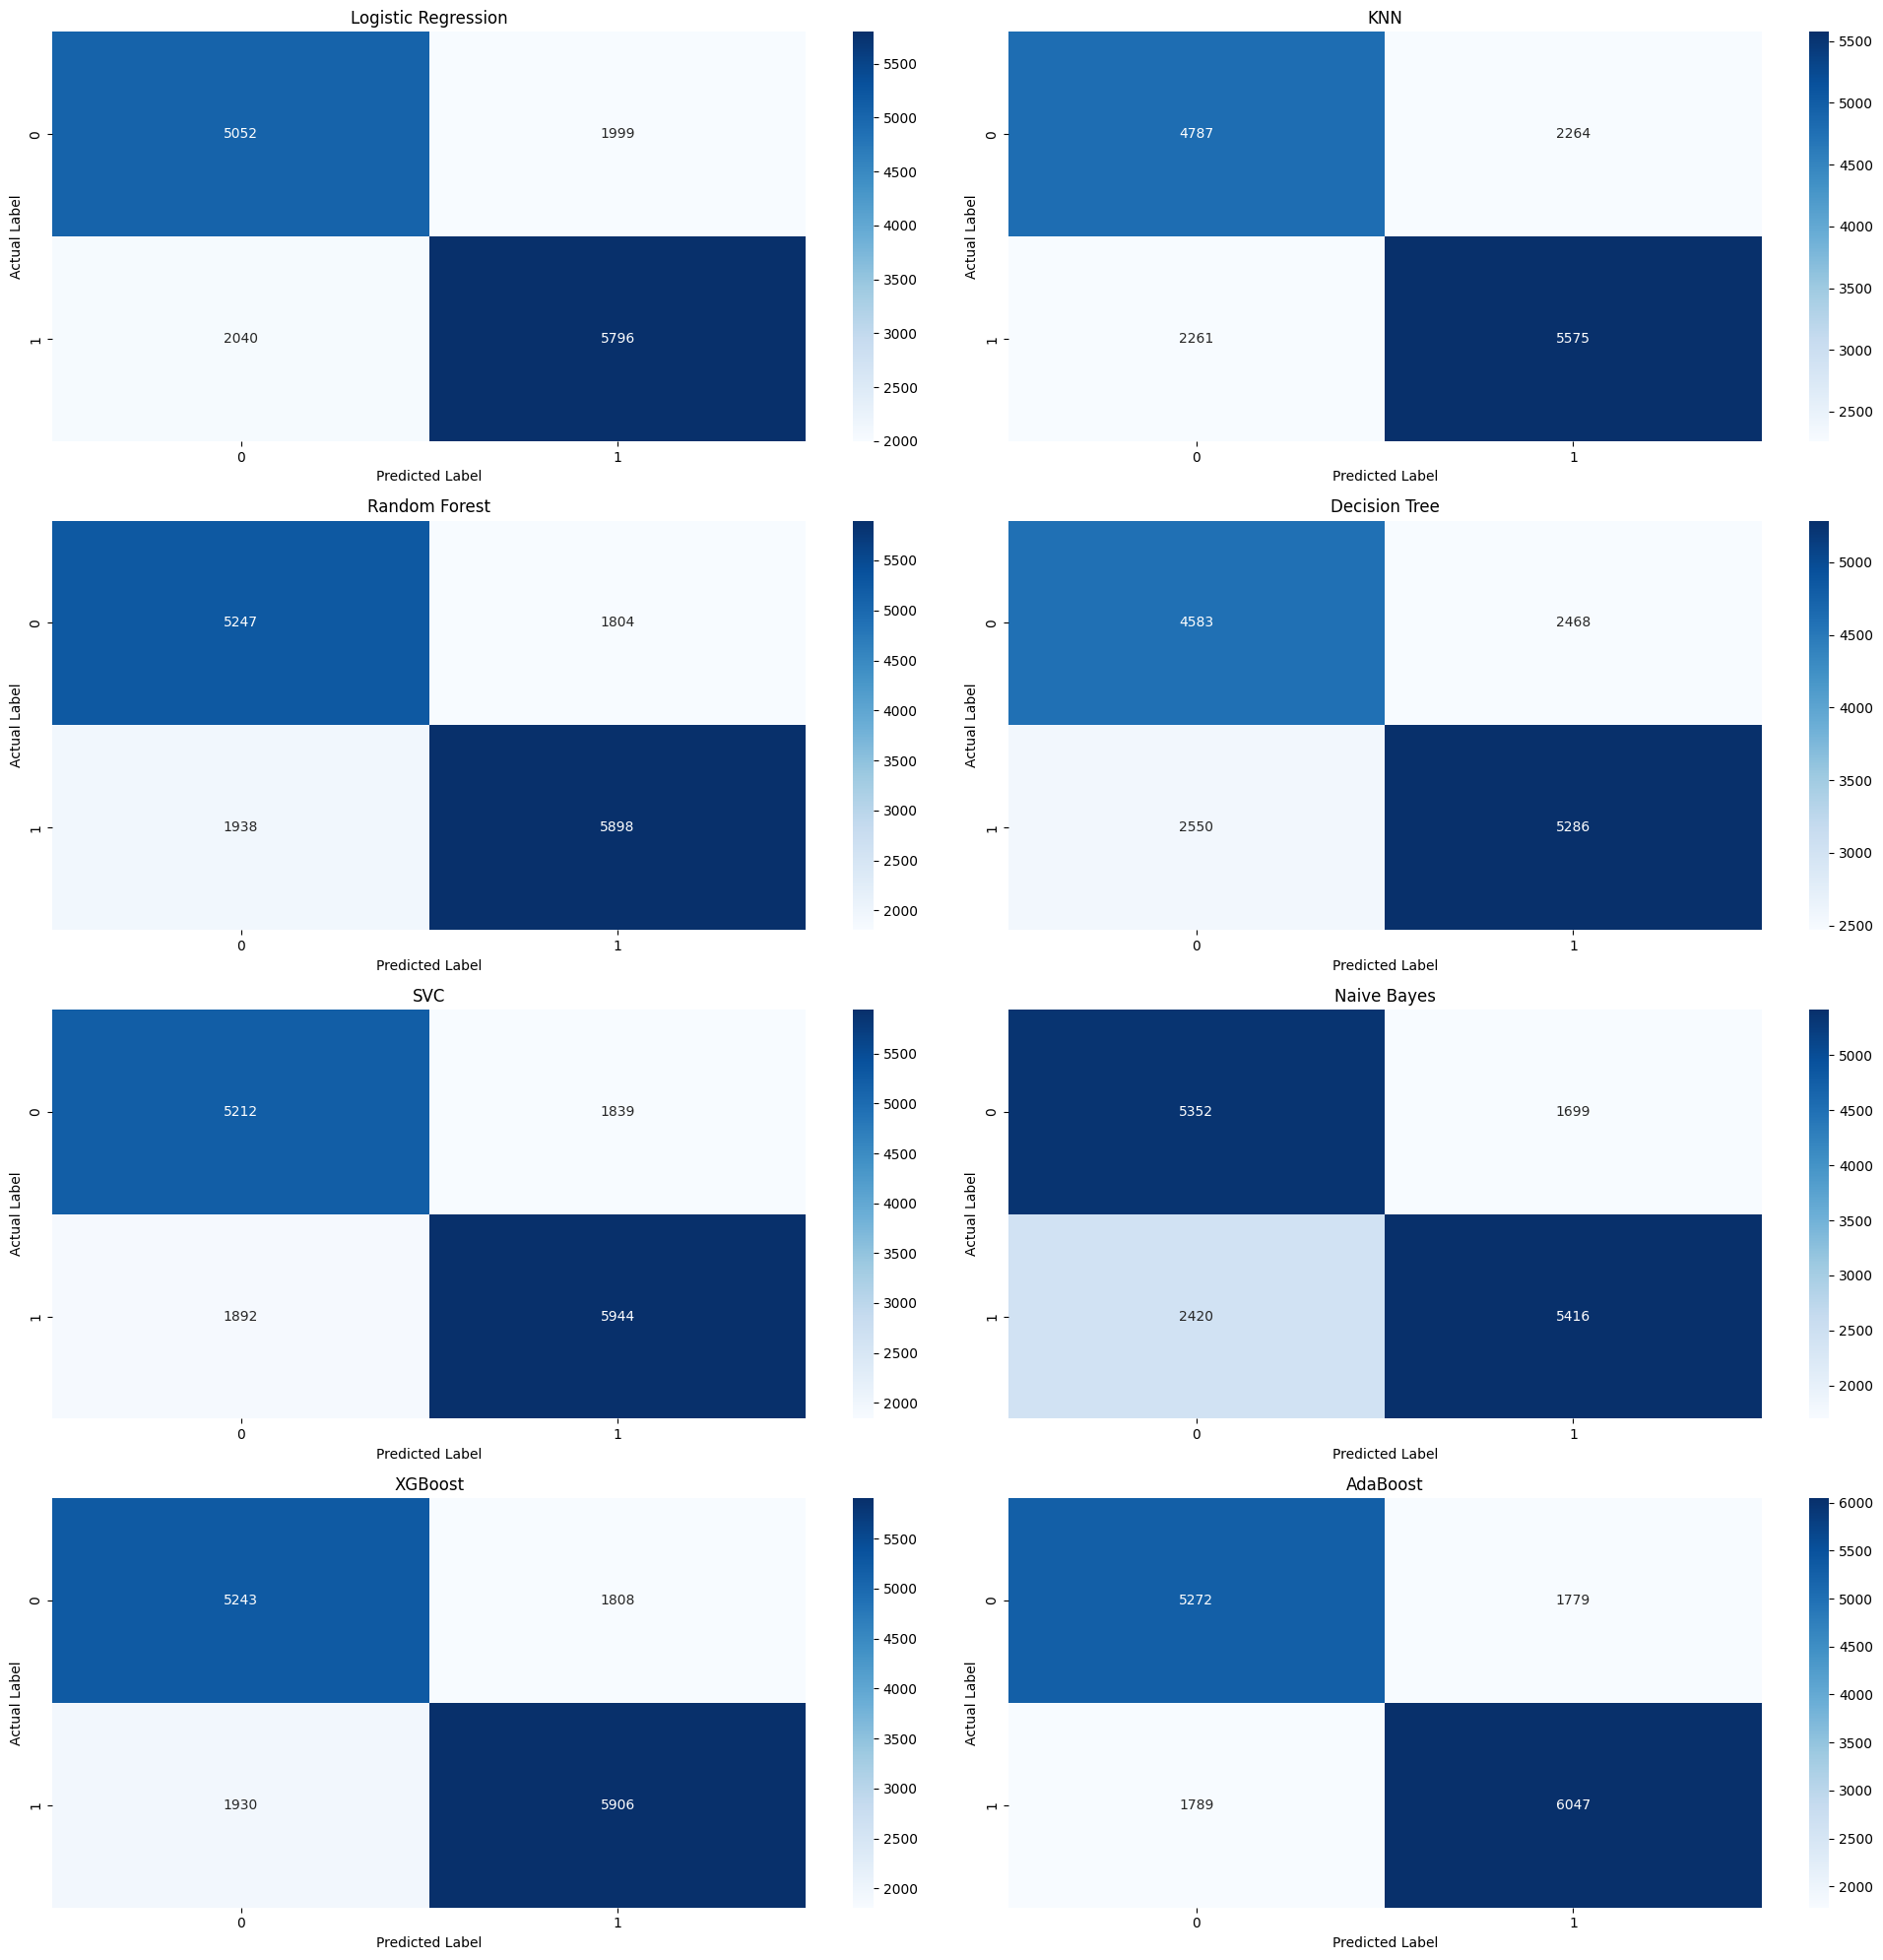

In [21]:
# Plot all confusion matrix on one plot
plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
sns.heatmap(confusion_matrix(y_test, lg_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression')

plt.subplot(4, 2, 2)
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN')

plt.subplot(4, 2, 3)
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest')

plt.subplot(4, 2, 4)
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Decision Tree')

plt.subplot(4, 2, 5)
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('SVC')

plt.subplot(4, 2, 6)
sns.heatmap(confusion_matrix(y_test, nb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes')

plt.subplot(4, 2, 7)
sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')   
plt.ylabel('Actual Label')
plt.title('XGBoost')

plt.subplot(4, 2, 8)
sns.heatmap(confusion_matrix(y_test, ada_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('AdaBoost')


plt.tight_layout()
plt.show()

## END